In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

## Common tickers

In [3]:
# EQUITIES
#MSCI World: URTH
# S&P 500:  ^GSPC
# Russell 2000: ^RUT
# FTSE 100: ^FTSE
# Nikkei 225: ^N225
# Nasdaq = ^IXIC
# EURO STOXX 50 = ^STOXX50E
# ishares MSCI ACWI = ACWI

# FIXED INCOME
# Treasury Yield 10 Years: ^TNX
# Treasury Yield 30 Years: ^TYX

# OTHER
# Bitcoin: BTC-USD
# Gold: GC=F
# GBP/USD: GBPUSD=X
# EUR/USD: EURUSD=X
# EUR / GBP: EURGBP=X


## Enter ticker and dates

In [2]:
ticker = yf.Ticker("ACWI")
start = dt.date(year=2000,month=10,day=31)
end = dt.date(year=2020,month=12,day=31)

# display(ticker.info)

## Calculations


In [3]:
hist = pd.DataFrame(ticker.history(start=start,end=end),columns=['Close'])

# cumulate return
lst = hist['Close'].iloc[-1]
frst = hist['Close'].iloc[0]
cum_ret = (lst/frst) -1

# annualized return
tot_days=float(hist.shape[0])
ann = (252/tot_days)
ann_ret = ((1+cum_ret)**(ann))-1

# volatility
hist['daily_return'] = hist['Close'].pct_change(1)
vol = np.std(hist['daily_return'])

# cumulative volatility
ann_vol=vol*np.sqrt(252)

In [4]:
hist.to_csv('hist.csv')

## Print results

start value:38.94 end value:90.66
cumulative return of 1.3284 from 2000-10-31 to 2020-12-31
annualized return of 0.0685 from 2000-10-31 to 2020-12-31
volatility of 0.0137 from 2000-10-31 to 2020-12-31
annualized volatility of 0.2173 from 2000-10-31 to 2020-12-31


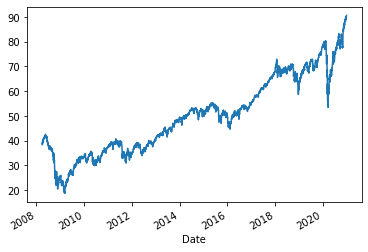

In [5]:
print(f'start value:{round(frst,2)} end value:{round(lst,2)}')
print(f'cumulative return of {round(cum_ret,4)} from {start} to {end}')
print(f'annualized return of {round(ann_ret,4)} from {start} to {end}')
print(f'volatility of {round(vol,4)} from {start} to {end}')
print(f'annualized volatility of {round(ann_vol,4)} from {start} to {end}')

hist['Close'].plot(legend=None)

# 